# カルマンフィルタ

## モデル
- $\mu_{t} \sim Normal(\mu_{t-1},\sigma_{\mu}) $

- $Y_{t} \sim Normal(\mu_{t},\sigma_{Y}) $

In [159]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 12)

In [160]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

In [161]:
stan_code1 = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters {
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model {
    mu[2:T] ~ normal(mu[1:(T-1)],s_mu);
    Y ~ normal(mu,s_Y);
}
generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T]=mu;
    
    for(t in 1:T_pred){
        mu_all[T+t] =normal_rng(mu_all[T+t-1],s_mu);
        y_pred[t] =normal_rng(mu_all[T+t-1],s_Y);
    }
}
"""

In [162]:
stan_code2 = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters {
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model {
    mu[3:T] ~ normal(2*mu[2:(T-1)]-mu[1:(T-2)],s_mu);
    Y ~ normal(mu,s_Y);
}
generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T]=mu;
    
    for(t in 1:T_pred){
        mu_all[T+t] =normal_rng(2*mu_all[T+t-1]-mu_all[T+t-2],s_mu);
        y_pred[t] =normal_rng(mu_all[T+t-1],s_Y);
    }
}
"""

In [163]:
stan_code3 = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters {
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model {
    mu[4:T] ~ normal(3*mu[3:(T-1)] -3*mu[2:(T-2)] +  mu[1:(T-3)],s_mu);
    Y ~ normal(mu,s_Y);
}
generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T]=mu;
    
    for(t in 1:T_pred){
    
        
        
        mu_all[T+t] =normal_rng(3*mu_all[T+t-1]-3*mu_all[T+t-2]+mu_all[T+t-3],s_mu);
        
        y_pred[t] =normal_rng(mu_all[T+t-1],s_Y);
    }
}
"""

In [164]:


y=np.cumsum(np.random.normal(3,10,size=100))
stan_dat = {
    'T': 100,
    'T_pred':50,
    'Y': y
}

fit1 = pystan.stan(model_code = stan_code1, data = stan_dat, iter = 2500, chains = 4)
fit2 = pystan.stan(model_code = stan_code2, data = stan_dat, iter = 2500, chains = 4)
fit3 = pystan.stan(model_code = stan_code3, data = stan_dat, iter = 2500, chains = 4)


In [165]:
ms1=fit1.extract()
ms2=fit2.extract()
ms3=fit3.extract()

In [166]:
mu1=ms1["mu_all"]
mu2=ms2["mu_all"]
mu3=ms3["mu_all"]

In [167]:
mu1_mean=np.mean(mu1,axis=0)
mu1_sigma=np.std(mu1,axis=0)

mu2_mean=np.mean(mu2,axis=0)
mu2_sigma=np.std(mu2,axis=0)

mu3_mean=np.mean(mu3,axis=0)
mu3_sigma=np.std(mu3,axis=0)

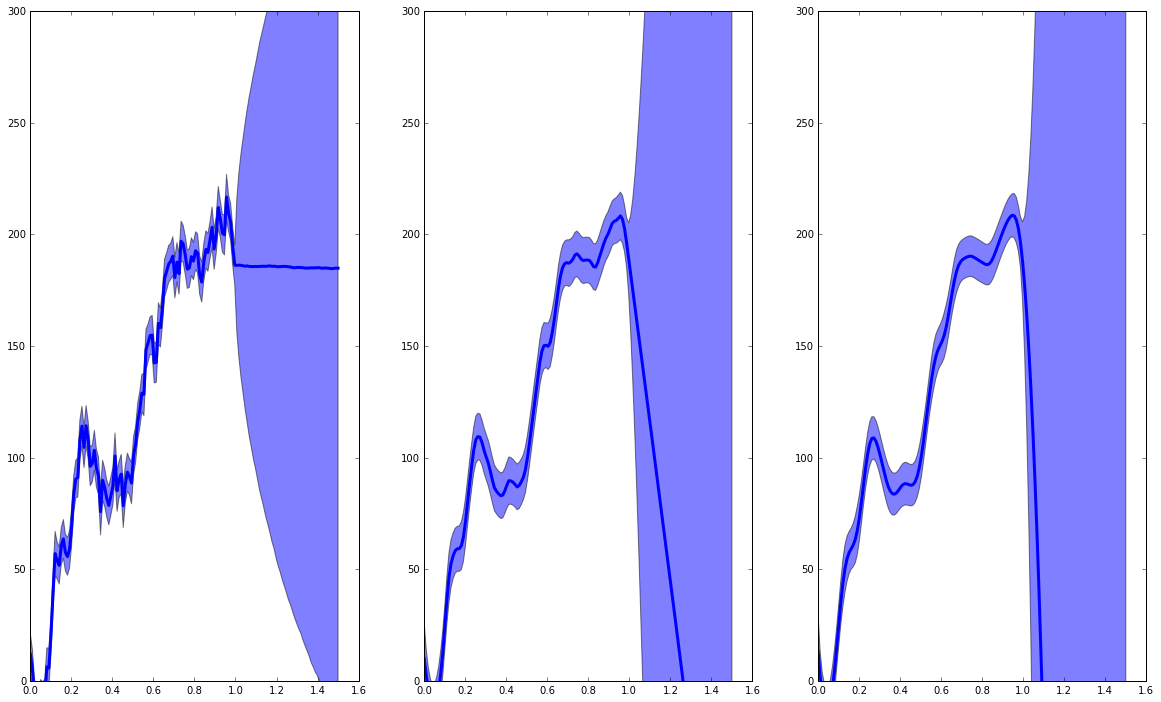

In [169]:

x=np.linspace(0,1.5,150)

plt.subplot(1,3,1)
plt.ylim(0,300)
plt.plot(x,mu1_mean,linewidth=3)
plt.fill_between(x,mu1_mean-mu1_sigma*3,mu1_mean+mu1_sigma*3,alpha=0.5)
plt.subplot(1,3,2)
plt.ylim(0,300)
plt.plot(x,mu2_mean,linewidth=3)
plt.fill_between(x,mu2_mean-mu2_sigma*3,mu2_mean+mu2_sigma*3,alpha=0.5)

plt.subplot(1,3,3)
plt.ylim(0,300)
plt.plot(x,mu3_mean,linewidth=3)
plt.fill_between(x,mu3_mean-mu3_sigma*3,mu3_mean+mu3_sigma*3,alpha=0.5)



#plt.plot(x,y,"ro-",linewidth=3)